<a class="anchor" id="0"></a>
# **Build My Very First NLP Model: N-Gram Languange Model (a probabilistic language model)**

An N-gram language model predicts the probability of a given N-gram within any sequence of words in the language. If we have a good N-gram model, we can predict p(w | h) – what is the probability of seeing the word w given a history of previous words h – where the history contains n-1 words.

<a class="anchor" id="0.1"></a>
# **How to estimate the probability to be able to construct the model** 

<d1>
<dt> Let's use these two steps.</dt>
<dd>1. Understand the Chain rule of probability</dd>
<dd>2. Use this knowledge to simplify with an assumption</dd>
</d1>

### Goal: Compute the probability of an upcomign word (which is related to the probability of a sequence of words)

$P(w_4|w_1,w_2,w_3)$ versus $P(w_1,w_2,w_3, w_4)$

### A model that computes either of these is called a language model

$P(W)=P(w_1,w_2,w_3, w_4)$ OR $P(w_4|w_1,w_2,w_3)$ signify languages models (LM), we use the term **LM** as a standard.

### Example 1: Understanding the Chain Rule of Probability

$P($"difficult"$|$"This subject is"$)$

$P($"This subject is difficult"$)= P($"This"$)*P($"subject"$|$"This"$)*P($"is"$|$"This subject"$)*P($"difficult"$|$"This subject is"$)$

Let's think for a second... what happens if we also considered anything that came before this sentence? What if this sentence came from a book and there were many sentences before it, etc.

The right hand side of the equation would continue to grow per word included. The formula looks like this:

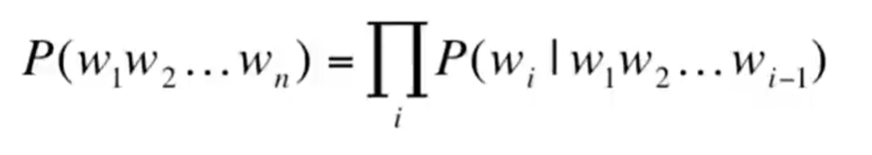<br>This is the join probability of a sequence of events. It's the product of all i of the probability of the work given the prefix of it.

#### Could we just count and make this easier?

For example: how many times do we see "This subject is difficult" over the number of times we see "This subject is"?

$$ \frac{\text{"This subject is difficult"}}{\text{"This subject is"}}   $$ 

## No! There are just too many possible sentences that we would never have enough data to see all possible counts of all possible sentences.

### Example 1 Cont'd: Applying the Markov Assumption (Andrei Markov) to Simplify 

Simplifying $P($"difficult"$|$"This subject is"$)$ by estimating it to be...

# $P($"difficult"$|$"This subject is"$)\approx P($"difficult"$|$"is"$)$

### OR Maybe...

# $P($"difficult"$|$"This subject is"$)\approx P($"difficult"$|$"subject is"$)$

Markov assumption says:

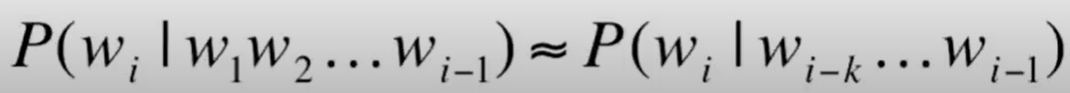

### We estimate the probability of $w_i$ given the entire prefix, $w_1 w_2...w_{i-1}$ by simplifying it to something simpler, the probability of $w_i$ given just a few of the last words.

# What is the simplest case? 

## **OBSERVE** Simplest case: Uni-gram model

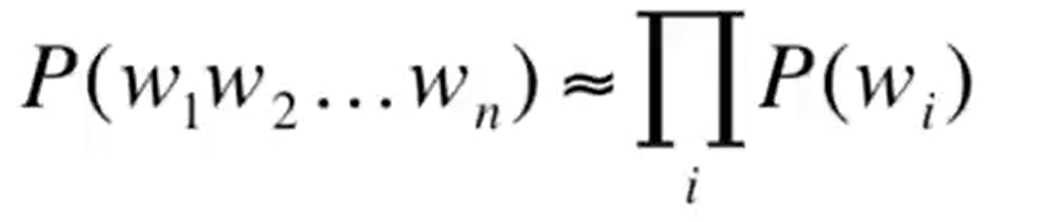

### The above says, we can estimate the probability of a sequence of words by estimating using the product of the probailities of the individual words. 

### Here are some auto generated sentences from a unigram model:

### <center> *"fifth, an, of, futures, the, an, incorporated, a, a, the, inflation, most, quarter, in, is, , mass, thrift, did, eighty, said, hard"* </center>

## **OBSERVE** Another simple case: Bi-gram model

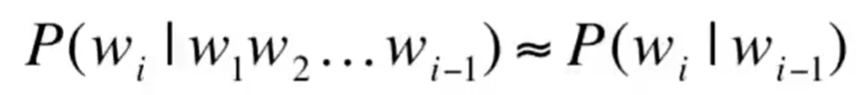

### The above says, we can estimate the probability of a sequence of words by estimating using the product 

### <center>*"texaco, rose, one, in, this, issue, is, pursuing, growth, in, a, boiler, house, said, mr., gurria, mexico, 's, motion, control, proposal, without, permission, from, five, hunfred, fifty, five, yen"* </center>

### <center>*"outisde, new, car, parking, lot, of, the, agreement"*</center>

### This can be extended to tri-grams, 4-grams, 5-grams. etc.

### This is an insufficient language model, because language has long distance dependencies.

### Take a look at this sentence below, would you be able to predict the next word would have been "crashed" given the last word in the sentence?

### <center> *"The computer I had just put into the machine room on the fifth floor crashed."*</center>

### given the word, *"floor"*, you most liekly would not have guessed *"crashed"* came next. The term, *"computer"* was the subject, and is often used with the term, *"crashed"*.

### We can often get away with n-gram models because the local information turns out to be just enough information especially when we get up to tri-grams and 4-grams. 

<div class="alert alert-block alert-success">
<b>SUCCESS! You have Successfully soaked up the information needed to understand what an N-gram is! Let's build a basic language model!</b> 
</div>

### Let's use trigrams of the Reuters corpus. Reuters corpus is a collection of 10,788 news documents totaling 1.3 million words. We can build a language model in a few lines of code using the NLTK package:

nltk.tokenize.punkt module
Punkt Sentence Tokenizer

This tokenizer divides a text into a list of sentences by using an unsupervised algorithm to build a model for abbreviation words, collocations, and words that start sentences. It must be trained on a large collection of plaintext in the target language before it can be used.

The NLTK data package includes a pre-trained Punkt tokenizer for English.

In python, we use nltk ( natural language toolkit) for its implementation. punkt is one of the modules in nltk. Punkt is made to learn parameters from a corpus in an unsupervised way that is related to the target domain, such as a list of abbreviations, acronyms, etc.

In [2]:
from nltk.corpus import reuters
from nltk import bigrams, trigrams
from collections import Counter, defaultdict # defaultdict: It is a dictionary subclass that is used to return a dictionary-like object. 
# A Counter is a dict subclass for counting hashable objects. 
# It is a collection where elements are stored as dictionary keys and their counts are stored as dictionary values. 
# Counts are allowed to be any integer value including zero or negative counts.
import nltk
nltk.download('reuters') # The dataset
nltk.download('punkt') # made to learn parameters from a corpus in an unsupervised way that is related to the target domain, such as a list of abbreviations, acronyms, etc.
nltk.download('punkt_tab') # need this one, too

[nltk_data] Downloading package reuters to
[nltk_data]     /Users/thaophamsmacbook/nltk_data...
[nltk_data]   Package reuters is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/thaophamsmacbook/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/thaophamsmacbook/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [3]:
# Create a placeholder for model
model = defaultdict(lambda: defaultdict(lambda: 0)) # Preparing to store information in the form of a dictionary

## We first split our text into trigrams with the help of NLTK and then calculate the frequency in which each combination of the trigrams occurs in the dataset.
Nested Loop:
- Loop 1 iterates all the sentences of Reuters Corpus
    - Loop 2 iterates  each sentence

In [ ]:
# Count frequency of co-occurance  
i = 0 
for sentence in reuters.sents(): # reuters.sents() is a method used to access the Reuters Corpus, a collection of news articles, and split it into sentences.
    for w1, w2, w3 in trigrams(sentence, pad_right=True, pad_left=True):
        model[(w1, w2)][w3] += 1
        if i < 2:
            print("This is the sentence from reuters: ", sentence)
            print("This is w1: ", w1)
            print("This is w2: ", w2)
            print("This is w3: ", w3)
            print("This is model[(w1, w2)][w3]: ", model[(w1, w2)][w3])
            # print("This is model[(w1, w2)]: ", model[(w1, w2)]) this is the entire list of probabilities
            i = i+1

This is the sentence from reuters:  ['ASIAN', 'EXPORTERS', 'FEAR', 'DAMAGE', 'FROM', 'U', '.', 'S', '.-', 'JAPAN', 'RIFT', 'Mounting', 'trade', 'friction', 'between', 'the', 'U', '.', 'S', '.', 'And', 'Japan', 'has', 'raised', 'fears', 'among', 'many', 'of', 'Asia', "'", 's', 'exporting', 'nations', 'that', 'the', 'row', 'could', 'inflict', 'far', '-', 'reaching', 'economic', 'damage', ',', 'businessmen', 'and', 'officials', 'said', '.']
This is w1:  None
This is w2:  None
This is w3:  ASIAN
This is model[(w1, w2)][w3]:  1
This is the sentence from reuters:  ['ASIAN', 'EXPORTERS', 'FEAR', 'DAMAGE', 'FROM', 'U', '.', 'S', '.-', 'JAPAN', 'RIFT', 'Mounting', 'trade', 'friction', 'between', 'the', 'U', '.', 'S', '.', 'And', 'Japan', 'has', 'raised', 'fears', 'among', 'many', 'of', 'Asia', "'", 's', 'exporting', 'nations', 'that', 'the', 'row', 'could', 'inflict', 'far', '-', 'reaching', 'economic', 'damage', ',', 'businessmen', 'and', 'officials', 'said', '.']
This is w1:  None
This is w2:

## We then use it to calculate probabilities of a word, given the previous two words. That’s essentially what gives us our Language Model!

In [ ]:
# Let's transform the counts to probabilities
i= 0
j= 0
for w1_w2 in model:
    total_count = float(sum(model[w1_w2].values()))
    for w3 in model[w1_w2]:
        if j < 5:
            print("This is model[w1_w2][w3] before hand: ", model[w1_w2][w3]) 
            print("This is w3: ", w3)
            
        model[w1_w2][w3] /= total_count # /= operator is a shorthand for division and assignment. It divides the value of the variable on the left by the value on the right, and then assigns the result back to the variable on the left.
        if j < 5:
            print("This is model[w1_w2][w3] after hand: ", model[w1_w2][w3]) 
            j = j+1
    if i<5:
        print("This is w1_w2: ", w1_w2)
        print("This is total_count: ",total_count)
        #print("This is model[w1_w2]: ", model[w1_w2]) this is the entire list of probabilities

    i=i+1

This is model[w1_w2][w3] before hand:  4
This is w3:  ASIAN
This is model[w1_w2][w3] after hand:  7.31047591198187e-05
This is model[w1_w2][w3] before hand:  446
This is w3:  They
This is model[w1_w2][w3] after hand:  0.008151180641859785
This is model[w1_w2][w3] before hand:  1054
This is w3:  But
This is model[w1_w2][w3] after hand:  0.019263104028072228
This is model[w1_w2][w3] before hand:  8839
This is w3:  The
This is model[w1_w2][w3] after hand:  0.16154324146501936
This is model[w1_w2][w3] before hand:  1
This is w3:  Unofficial
This is model[w1_w2][w3] after hand:  1.8276189779954676e-05
This is w1_w2:  (None, None)
This is total_count:  54716.0
This is w1_w2:  (None, 'ASIAN')
This is total_count:  4.0
This is w1_w2:  ('ASIAN', 'EXPORTERS')
This is total_count:  1.0
This is w1_w2:  ('EXPORTERS', 'FEAR')
This is total_count:  1.0
This is w1_w2:  ('FEAR', 'DAMAGE')
This is total_count:  1.0


## We then use it to calculate probabilities of a word, given the previous two words. That’s essentially what gives us our Language Model!


## Let’s make simple predictions with this language model. We will start with two simple words – “today the”. We want our model to tell us what will be the next word:

In [6]:
print(dict(model['today', 'the']))

{'public': 0.05555555555555555, 'European': 0.05555555555555555, 'Bank': 0.05555555555555555, 'price': 0.1111111111111111, 'emirate': 0.05555555555555555, 'overseas': 0.05555555555555555, 'newspaper': 0.05555555555555555, 'company': 0.16666666666666666, 'Turkish': 0.05555555555555555, 'increase': 0.05555555555555555, 'options': 0.05555555555555555, 'Higher': 0.05555555555555555, 'pound': 0.05555555555555555, 'Italian': 0.05555555555555555, 'time': 0.05555555555555555}


## What should go with "the" in the below code?

In [ ]:
print(dict(model['the', 'company'])) # 'company' was put in because it's the highest probability in the code above

{"'": 0.2452344152498712, 'is': 0.02009273570324575, 'was': 0.0190623390005152, 'said': 0.21947449768160743, 'lost': 0.0030911901081916537, 'reported': 0.018031942297784646, 'to': 0.03554868624420402, 'has': 0.02266872746007213, 'and': 0.01648634724368882, '.': 0.08294693456980938, 'as': 0.004121586810922205, 'of': 0.0015455950540958269, ',': 0.04070066975785677, 'earned': 0.0072127769191138585, 'will': 0.019577537351880475, 'intends': 0.002575991756826378, 'into': 0.0015455950540958269, 'also': 0.0020607934054611026, ',"': 0.005667181865018032, 'told': 0.0015455950540958269, 'were': 0.0010303967027305513, 'in': 0.006697578567748583, '"': 0.0015455950540958269, 'had': 0.01751674394641937, 'realised': 0.0005151983513652757, 'by': 0.005151983513652756, 'recovered': 0.0005151983513652757, 'at': 0.005667181865018032, 'hopes': 0.0015455950540958269, 'anticipates': 0.0005151983513652757, 'would': 0.02215352910870685, 'could': 0.0030911901081916537, 'owed': 0.0005151983513652757, 'received': 

# CHALLENGE!!! How can you make this process continue on its own and set a threshold for it to stop?

Starting with text = ["today", "the"]

## If we keep following this process iteratively, we will soon have a coherent sentence! Here is a script to play around with generating a random piece of text using our n-gram model:

In [11]:
import random

# starting words
text = ["today", "the"]
sentence_finished = False
 
while not sentence_finished:
  # select a random probability threshold  
  r = random.random()
  accumulator = .0

  for word in model[tuple(text[-2:])].keys():
      accumulator += model[tuple(text[-2:])][word]
      # select words that are above the probability threshold
      if accumulator >= r:
          text.append(word)
          break

  if text[-2:] == [None, None]:
      sentence_finished = True
 
print (' '.join([t for t in text if t]))

today the Higher Labour Tribunal in Brasilia university , told Reuters the two companies , said that for the new system , the Asia - Pacific tour by exchange executives promoting the hedging benefits of a 200 mln dlrs for the Reagan Administration officials , asking not to accept a clause in , but both the balance of payments deficit and domestic oriented firms were added to the official said China should tighten imports of French soft wheat has been acquired .


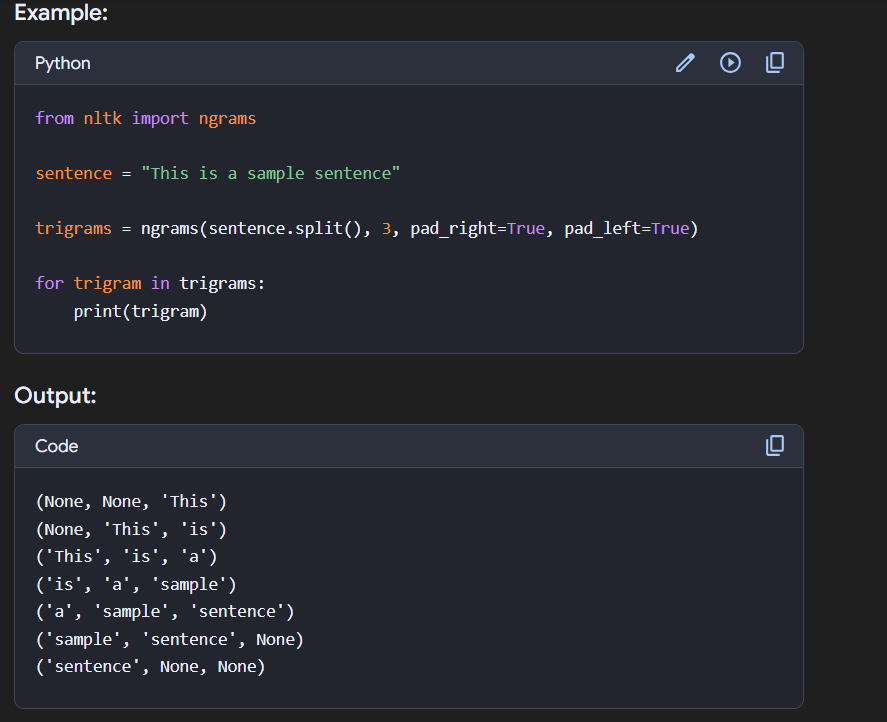

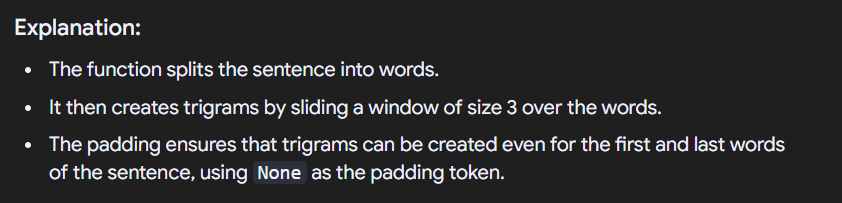